In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
import chess
import data_transform
import gc

In [2]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
# load model
import pickle
with open('./data/logreg_supervised_linear.pickle', 'rb') as f:
    logreg = pickle.load(f)

In [4]:
PIECES_NAMES = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen', 'King']

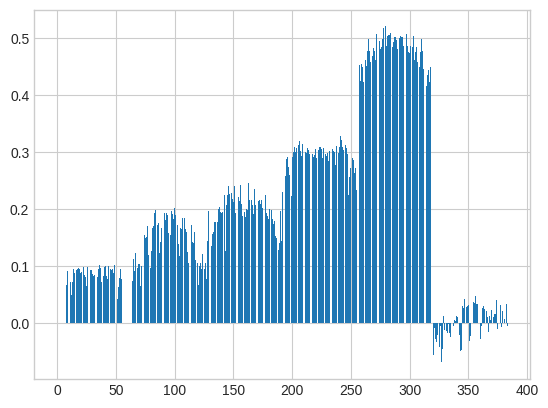

In [5]:
# display coefficients of logistic regression

# extract coefficients
coefficients = np.array(logreg.coef_)

# plot coefficients
plt.bar(range(len(coefficients)), coefficients)
plt.show()

In [6]:
# get pieces values
# reshape coefficients to 2D array
avg_coefficients = coefficients.reshape(6, 8, 8)

# make average of all coefficients for each piece on possible squares
pieces_values = []
for i, piece_name in enumerate(PIECES_NAMES):
    coeff_array = avg_coefficients[i]
    if piece_name == 'Pawn':
        coeff_array = coeff_array[1 : 7]
    pieces_values.append(coeff_array.mean())
    

# normalize values to pawns at homerank
print(avg_coefficients[0][1:7])
pawn_value = avg_coefficients[0][1:7].mean()
pieces_values = [value / pawn_value for value in pieces_values]

for piece_name, pieces_value in zip(PIECES_NAMES, pieces_values):
    print(piece_name, pieces_value)

[[0.06593601 0.09028715 0.08060312 0.07113648 0.04837852 0.07127118
  0.09474875 0.08649329]
 [0.09201628 0.09353416 0.09619479 0.09481948 0.0864534  0.08933205
  0.09855099 0.08402958]
 [0.07948928 0.06530323 0.09701508 0.10502632 0.092092   0.09216004
  0.08614331 0.08178008]
 [0.08305535 0.0830081  0.08068577 0.09508327 0.10074245 0.09566232
  0.07143341 0.08163063]
 [0.09804364 0.09955117 0.08289433 0.07761438 0.10042721 0.09452117
  0.09235793 0.09410156]
 [0.08693164 0.10167156 0.07898338 0.04131488 0.06248793 0.07808968
  0.09362519 0.07716806]]
Pawn 1.0
Knight 1.657674845125733
Bishop 2.2651570287777103
Rook 3.4191765852366953
Queen 5.6086160809850805
King 1.1058852786793308e-05


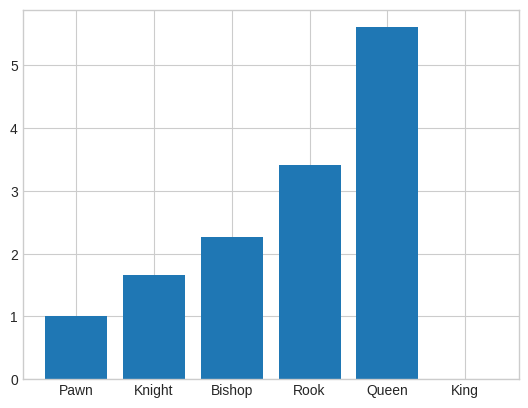

In [7]:
# plot graph of pieces values
plt.bar(range(len(pieces_values)), pieces_values)
plt.xticks(range(len(pieces_values)), PIECES_NAMES)
plt.show()

In [8]:
normalized_coefficients = avg_coefficients / pawn_value

In [9]:
def display_2d_array_as_heatmap(array, title):
    """displays 2d array as heatmap"""
    # round array
    array = np.round(array, 1)
    fig, ax = plt.subplots()
    im = ax.imshow(array)
    
    # set x and y ticks to chess coordinates
    x_labels = [chr(ord('A') + i) for i in range(len(array[0]))]
    y_labels = [str(i + 1) for i in reversed(range(len(array)))]
    ax.set_xticks(np.arange(len(array[0])))
    ax.set_yticks(np.arange(len(array)))
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    
    # rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # add value annotations to each cell
    for i in range(len(array)):
        for j in range(len(array[0])):
            text = ax.text(j, i, array[i, j], ha="center", va="center", color="w")
    
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

In [10]:
# unuse seaborn style
plt.style.use('default')

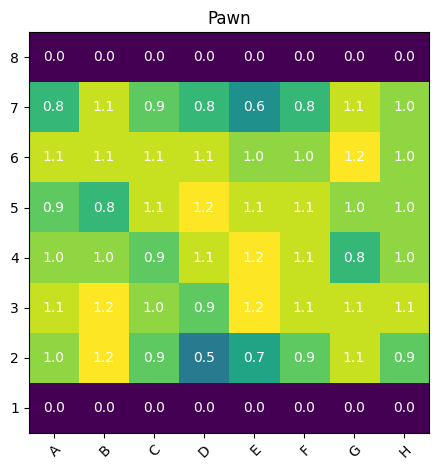

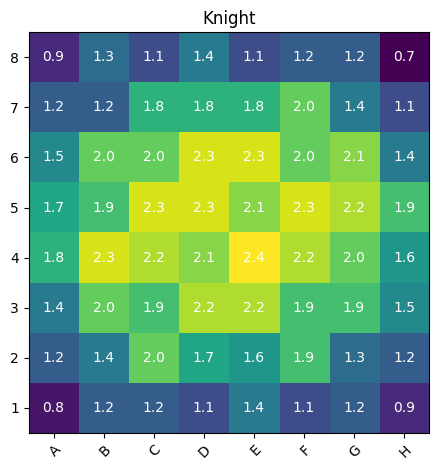

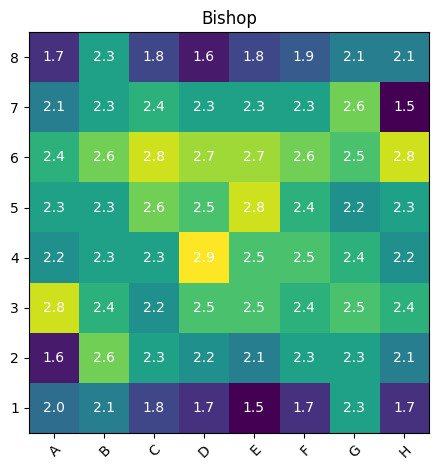

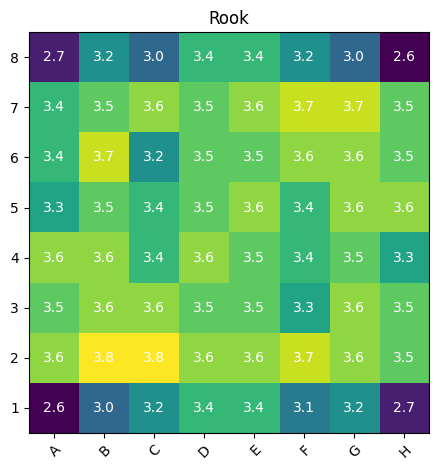

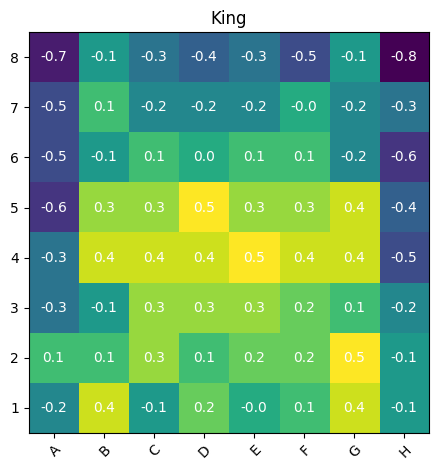

In [11]:
# display coefficients as heatmap
for i, piece_name in enumerate(PIECES_NAMES):
    display_2d_array_as_heatmap(normalized_coefficients[i], piece_name)